<a href="https://colab.research.google.com/github/andrewolf80550/AA/blob/main/DeteccionFraudeTarjetasCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGANDO DATASET...
Dataset cargado: 284807 filas y 31 columnas
Memoria utilizada: 67.36 MB

ANÁLISIS EXPLORATORIO DE DATOS

--- INFORMACIÓN DEL DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17  

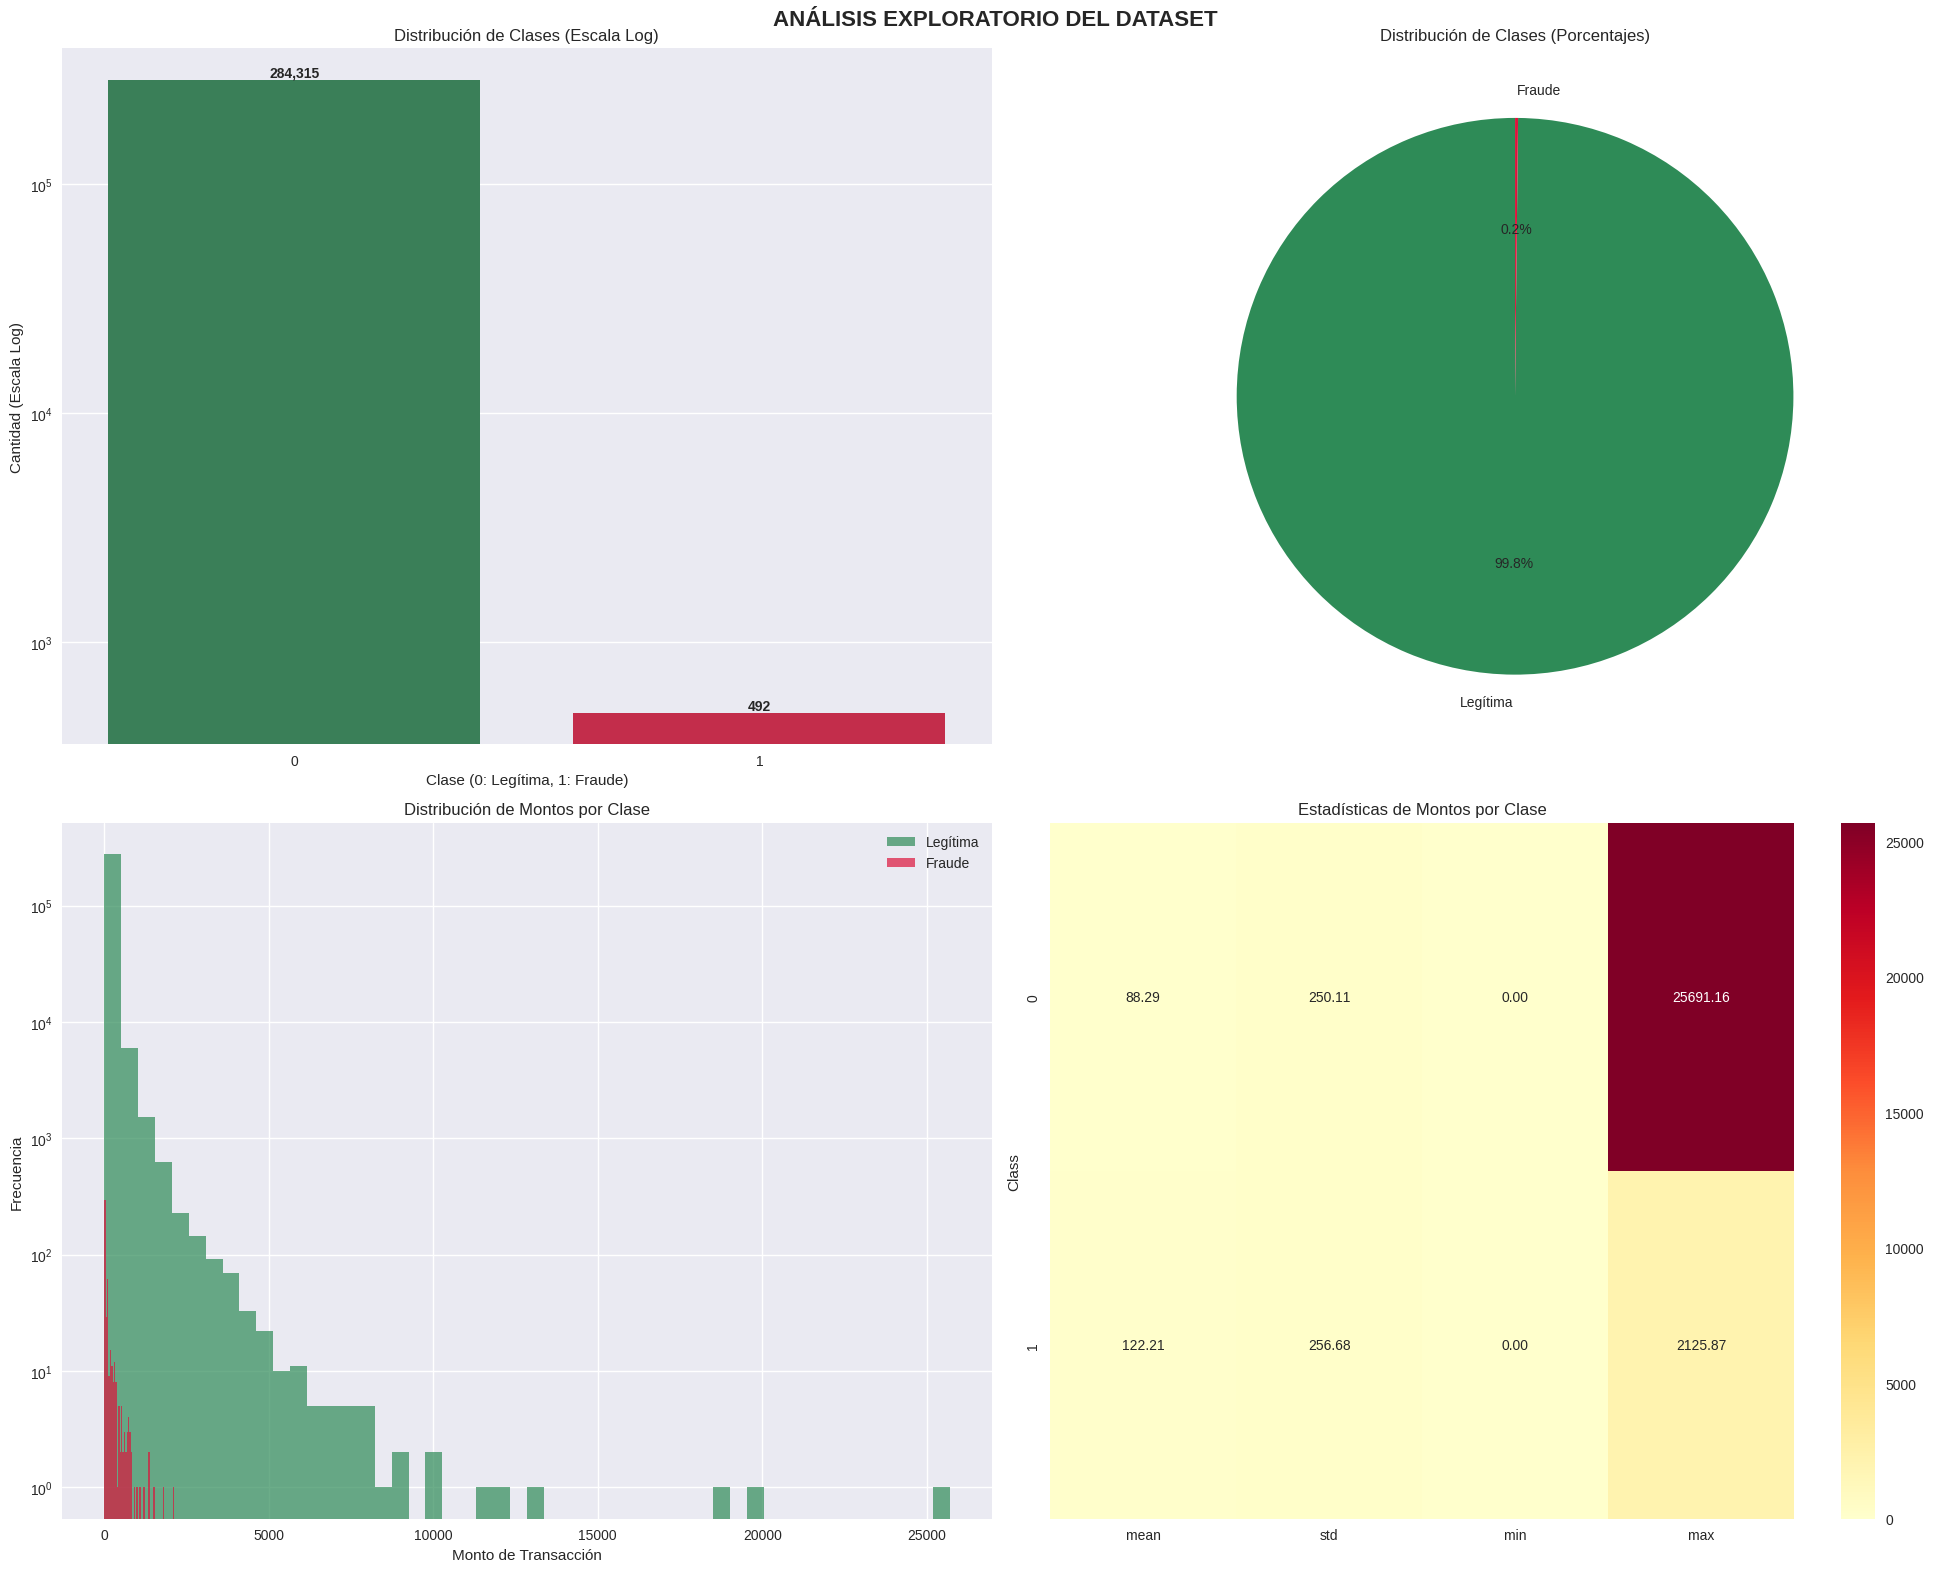


--- ANÁLISIS DE CORRELACIONES ---

Top 10 variables más correlacionadas con fraude:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Top 10 variables menos correlacionadas con fraude:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


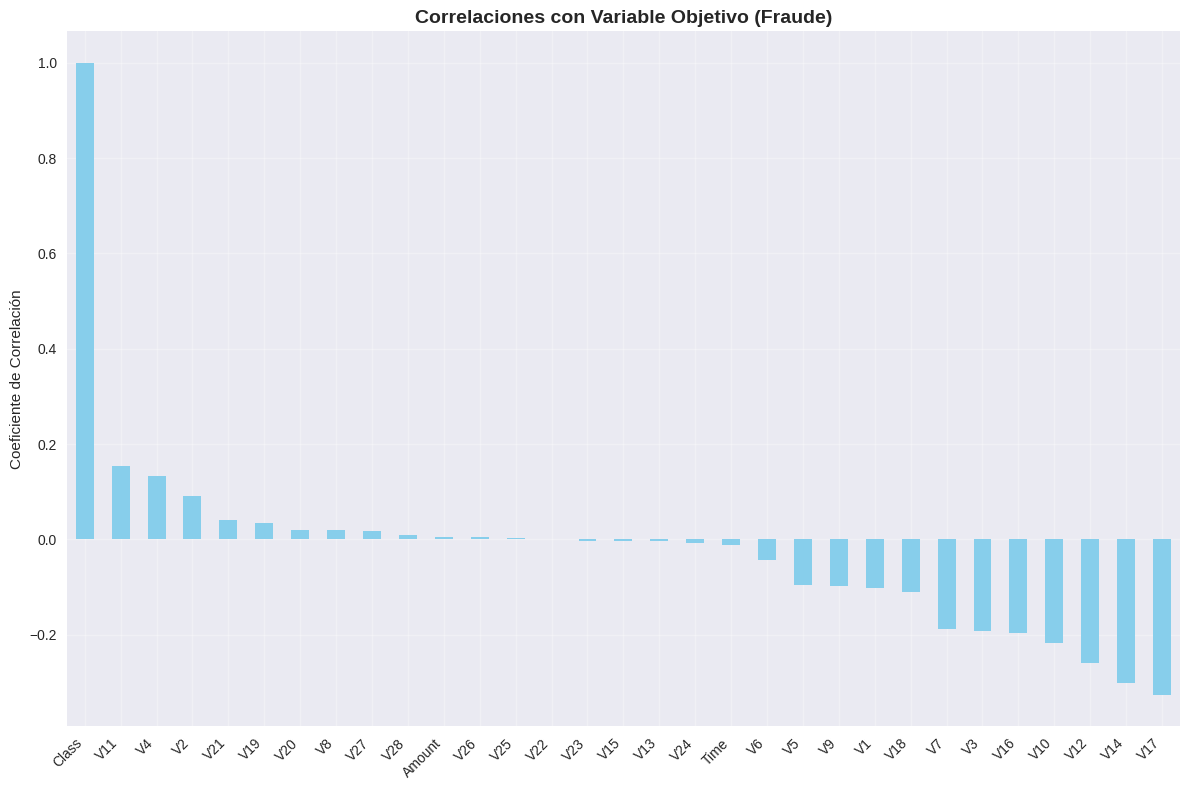


PREPARACIÓN DE DATOS...
Features (X): (284807, 30)
Target (y): (284807,)

División de datos:
  Training set: 213,605 muestras
  Test set: 71,202 muestras
  Proporción fraude en training: 0.0017
  Proporción fraude en test: 0.0017

✅ Datos escalados con RobustScaler

MANEJANDO CLASES DESEQUILIBRADAS...
Class weights calculados: {np.int64(0): np.float64(0.5008652385150725), np.int64(1): np.float64(289.43766937669375)}

Aplicando SMOTE para balancear clases...
  Antes de SMOTE:
    Clase 0: 213,236 muestras
    Clase 1: 369 muestras
  Después de SMOTE:
    Clase 0: 213,236 muestras
    Clase 1: 213,236 muestras

ENTRENANDO MODELOS...

--- Logistic Regression (Balanced) ---
  Accuracy: 0.9762
  F1-Score: 0.1140
  Precision (Fraude): 0.0609
  Recall (Fraude): 0.8862
  AUC-ROC: 0.9723

--- Random Forest (Balanced) ---
  Accuracy: 0.9972
  F1-Score: 0.5124
  Precision (Fraude): 0.3692
  Recall (Fraude): 0.8374
  AUC-ROC: 0.9843

--- Gradient Boosting ---


In [ ]:
# =============================================================================
# PROYECTO MEJORADO: DETECCIÓN DE FRAUDE EN TARJETAS DE CRÉDITO
# =============================================================================

# 1. INSTALACIÓN DE LIBRERÍAS ADICIONALES (ejecutar solo si es necesario)
!pip install imbalanced-learn

# 2. IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           average_precision_score, f1_score, precision_score, recall_score) # Added precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn para manejo de clases desequilibradas
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Scikit-plot para visualizaciones avanzadas
# import scikitplot as skplt # Removed scikit-plot import

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 3. CARGA Y EXPLORACIÓN DE DATOS
print("="*60)
print("CARGANDO DATASET...")
print("="*60)

# Cargar dataset (asegúrate de subir el archivo creditcard.csv a Colab)
df = pd.read_csv('creditcard.csv')

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 4. ANÁLISIS EXPLORATORIO MEJORADO
print("\n" + "="*60)
print("ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

# Información básica
print("\n--- INFORMACIÓN DEL DATASET ---")
print(df.info())

print("\n--- PRIMERAS 5 FILAS ---")
print(df.head())

print("\n--- ESTADÍSTICAS DESCRIPTIVAS ---")
print(df.describe())

# Verificación de valores nulos
print("\n--- VERIFICACIÓN DE VALORES NULOS ---")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("✅ No hay valores nulos en el dataset")
else:
    print("❌ Valores nulos encontrados:")
    print(null_counts[null_counts > 0])

# Análisis de la variable objetivo
print("\n--- ANÁLISIS DE LA VARIABLE OBJETIVO ---")
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("Distribución de clases:")
for i, (class_val, count) in enumerate(class_counts.items()):
    percentage = class_percentages.iloc[i]
    label = "FRAUDE" if class_val == 1 else "LEGÍTIMA"
    print(f"  Clase {class_val} ({label}): {count:,} transacciones ({percentage:.2f}%)")

# 5. VISUALIZACIONES MEJORADAS
print("\n" + "="*60)
print("CREANDO VISUALIZACIONES...")
print("="*60)

# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('ANÁLISIS EXPLORATORIO DEL DATASET', fontsize=16, fontweight='bold')

# 1. Distribución de clases con escala logarítmica
axes[0,0].set_title('Distribución de Clases (Escala Log)')
sns.countplot(data=df, x='Class', ax=axes[0,0], palette=['#2E8B57', '#DC143C'])
axes[0,0].set_yscale('log')
axes[0,0].set_xlabel('Clase (0: Legítima, 1: Fraude)')
axes[0,0].set_ylabel('Cantidad (Escala Log)')

# Agregar etiquetas de conteo
for i, v in enumerate(class_counts.values):
    axes[0,0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# 2. Distribución de clases con porcentajes
axes[0,1].set_title('Distribución de Clases (Porcentajes)')
wedges, texts, autotexts = axes[0,1].pie(class_percentages.values,
                                          labels=['Legítima', 'Fraude'],
                                          autopct='%1.1f%%',
                                          colors=['#2E8B57', '#DC143C'],
                                          startangle=90)
axes[0,1].set_aspect('equal')

# 3. Distribución de montos de transacción
axes[1,0].set_title('Distribución de Montos por Clase')
fraud_amounts = df[df['Class'] == 1]['Amount']
legit_amounts = df[df['Class'] == 0]['Amount']

axes[1,0].hist(legit_amounts, bins=50, alpha=0.7, label='Legítima', color='#2E8B57')
axes[1,0].hist(fraud_amounts, bins=50, alpha=0.7, label='Fraude', color='#DC143C')
axes[1,0].set_xlabel('Monto de Transacción')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].legend()
axes[1,0].set_yscale('log')

# 4. Estadísticas de montos por clase
axes[1,1].set_title('Estadísticas de Montos por Clase')
amount_stats = df.groupby('Class')['Amount'].agg(['mean', 'std', 'min', 'max']).round(2)
sns.heatmap(amount_stats, annot=True, cmap='YlOrRd', ax=axes[1,1], fmt='.2f')

plt.tight_layout()
plt.show()

# 6. ANÁLISIS DE CORRELACIONES
print("\n--- ANÁLISIS DE CORRELACIONES ---")

# Matriz de correlación con la variable objetivo
corr_with_target = df.corr()['Class'].sort_values(ascending=False)
print("\nTop 10 variables más correlacionadas con fraude:")
print(corr_with_target.head(10))
print("\nTop 10 variables menos correlacionadas con fraude:")
print(corr_with_target.tail(10))

# Visualización de correlaciones
plt.figure(figsize=(12, 8))
plt.title('Correlaciones con Variable Objetivo (Fraude)', fontsize=14, fontweight='bold')
corr_with_target.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Coeficiente de Correlación')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. PREPARACIÓN DE DATOS MEJORADA
print("\n" + "="*60)
print("PREPARACIÓN DE DATOS...")
print("="*60)

# Separar features y target
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

# División estratificada train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nDivisión de datos:")
print(f"  Training set: {X_train.shape[0]:,} muestras")
print(f"  Test set: {X_test.shape[0]:,} muestras")
print(f"  Proporción fraude en training: {y_train.mean():.4f}")
print(f"  Proporción fraude en test: {y_test.mean():.4f}")

# Escalado robusto (mejor para outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Datos escalados con RobustScaler")

# 8. MANEJO DE CLASES DESEQUILIBRADAS
print("\n" + "="*60)
print("MANEJANDO CLASES DESEQUILIBRADAS...")
print("="*60)

# Calcular class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print(f"Class weights calculados: {class_weight_dict}")

# Aplicar SMOTE para balancear las clases
print("\nAplicando SMOTE para balancear clases...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"  Antes de SMOTE:")
print(f"    Clase 0: {sum(y_train == 0):,} muestras")
print(f"    Clase 1: {sum(y_train == 1):,} muestras")
print(f"  Después de SMOTE:")
print(f"    Clase 0: {sum(y_train_balanced == 0):,} muestras")
print(f"    Clase 1: {sum(y_train_balanced == 1):,} muestras")

# 9. MODELOS MEJORADOS
print("\n" + "="*60)
print("ENTRENANDO MODELOS...")
print("="*60)

# Definir modelos con hiperparámetros optimizados
models = {
    'Logistic Regression (Balanced)': LogisticRegression(
        random_state=42,
        class_weight='balanced',
        max_iter=1000,
        solver='liblinear'
    ),
    'Random Forest (Balanced)': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ),
    'SVM (Balanced)': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42,
        class_weight='balanced',
        probability=True
    )
}

# Entrenar y evaluar modelos
results = {}
cv_scores = {}

for name, model in models.items():
    print(f"\n--- {name} ---")

    # Entrenar modelo
    if 'Balanced' in name:
        model.fit(X_train_balanced, y_train_balanced)
    else:
        model.fit(X_train_scaled, y_train)

    # Predicciones
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    # Métricas básicas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Métricas para fraude (clase 1)
    fraud_precision = precision_score(y_test, y_pred, pos_label=1)
    fraud_recall = recall_score(y_test, y_pred, pos_label=1)

    # AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Guardar resultados
    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision_fraud': fraud_precision,
        'recall_fraud': fraud_recall,
        'auc_roc': auc_roc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Precision (Fraude): {fraud_precision:.4f}")
    print(f"  Recall (Fraude): {fraud_recall:.4f}")
    if auc_roc:
        print(f"  AUC-ROC: {auc_roc:.4f}")

# 10. COMPARACIÓN DE MODELOS
print("\n" + "="*60)
print("COMPARACIÓN DE MODELOS")
print("="*60)

# Crear DataFrame de comparación
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()],
    'Precision (Fraude)': [results[model]['precision_fraud'] for model in results.keys()],
    'Recall (Fraude)': [results[model]['recall_fraud'] for model in results.keys()],
    'AUC-ROC': [results[model]['auc_roc'] for model in results.keys()]
})

print("Comparación de métricas:")
print(comparison_df.round(4))

# Visualización de comparación
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('COMPARACIÓN DE MODELOS', fontsize=16, fontweight='bold')

# 1. Accuracy
axes[0,0].bar(comparison_df['Modelo'], comparison_df['Accuracy'], color='skyblue')
axes[0,0].set_title('Accuracy por Modelo')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. F1-Score
axes[0,1].bar(comparison_df['Modelo'], comparison_df['F1-Score'], color='lightgreen')
axes[0,1].set_title('F1-Score por Modelo')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Precision vs Recall para Fraude
x = np.arange(len(comparison_df['Modelo']))
width = 0.35
axes[1,0].bar(x - width/2, comparison_df['Precision (Fraude)'], width, label='Precision', color='orange')
axes[1,0].bar(x + width/2, comparison_df['Recall (Fraude)'], width, label='Recall', color='red')
axes[1,0].set_title('Precision vs Recall para Fraude')
axes[1,0].set_ylabel('Score')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(comparison_df['Modelo'], rotation=45)
axes[1,0].legend()

# 4. AUC-ROC
axes[1,1].bar(comparison_df['Modelo'], comparison_df['AUC-ROC'], color='purple')
axes[1,1].set_title('AUC-ROC por Modelo')
axes[1,1].set_ylabel('AUC-ROC')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 11. ANÁLISIS DETALLADO DEL MEJOR MODELO
print("\n" + "="*60)
print("ANÁLISIS DETALLADO DEL MEJOR MODELO")
print("="*60)

# Encontrar el mejor modelo basado en F1-Score
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Modelo']
best_model_results = results[best_model_name]

print(f"🏆 MEJOR MODELO: {best_model_name}")
print(f"   F1-Score: {best_model_results['f1_score']:.4f}")
print(f"   AUC-ROC: {best_model_results['auc_roc']:.4f}")

# Matriz de confusión del mejor modelo
y_pred_best = best_model_results['predictions']
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legítima', 'Fraude'],
            yticklabels=['Legítima', 'Fraude'])
plt.title(f'Matriz de Confusión - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

# Reporte de clasificación detallado
print(f"\n📊 REPORTE DE CLASIFICACIÓN - {best_model_name}")
print("="*50)
print(classification_report(y_test, y_pred_best,
                          target_names=['Legítima', 'Fraude']))

# 12. CURVAS ROC Y PRECISION-RECALL
# print("\n" + "="*60) # Removed section 12 heading
# print("CURVAS DE EVALUACIÓN") # Removed section 12 heading
# print("="*60) # Removed section 12 heading

# Curvas ROC para todos los modelos
# plt.figure(figsize=(15, 6)) # Removed plotting code for ROC and PR curves

# plt.subplot(1, 2, 1) # Removed plotting code for ROC and PR curves
# for name, result in results.items(): # Removed plotting code for ROC and PR curves
#     if result['probabilities'] is not None: # Removed plotting code for ROC and PR curves
#         fpr, tpr, _ = roc_curve(y_test, result['probabilities']) # Removed plotting code for ROC and PR curves
#         auc = result['auc_roc'] # Removed plotting code for ROC and PR curves
#         plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})') # Removed plotting code for ROC and PR curves

# plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Removed plotting code for ROC and PR curves
# plt.xlabel('False Positive Rate') # Removed plotting code for ROC and PR curves
# plt.ylabel('True Positive Rate') # Removed plotting code for ROC and PR curves
# plt.title('Curvas ROC') # Removed plotting code for ROC and PR curves
# plt.legend() # Removed plotting code for ROC and PR curves
# plt.grid(True) # Removed plotting code for ROC and PR curves

# Curvas Precision-Recall
# plt.subplot(1, 2, 2) # Removed plotting code for ROC and PR curves
# for name, result in results.items(): # Removed plotting code for ROC and PR curves
#     if result['probabilities'] is not None: # Removed plotting code for ROC and PR curves
#         precision, recall, _ = precision_recall_curve(y_test, result['probabilities']) # Removed plotting code for ROC and PR curves
#         avg_precision = average_precision_score(y_test, result['probabilities']) # Removed plotting code for ROC and PR curves
#         plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.3f})') # Removed plotting code for ROC and PR curves

# plt.xlabel('Recall') # Removed plotting code for ROC and PR curves
# plt.ylabel('Precision') # Removed plotting code for ROC and PR curves
# plt.title('Curvas Precision-Recall') # Removed plotting code for ROC and PR curves
# plt.legend() # Removed plotting code for ROC and PR curves
# plt.grid(True) # Removed plotting code for ROC and PR curves

# plt.tight_layout() # Removed plotting code for ROC and PR curves
# plt.show() # Removed plotting code for ROC and PR curves

# 13. ANÁLISIS DE FEATURES IMPORTANTES (para Random Forest)
print("\n" + "="*60)
print("ANÁLISIS DE FEATURES IMPORTANTES")
print("="*60)

if 'Random Forest (Balanced)' in models:
    rf_model = models['Random Forest (Balanced)']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 15 features más importantes:")
    print(feature_importance.head(15))

    # Visualización de features importantes
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importancia')
    plt.title('Top 15 Features Más Importantes (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# 14. VALIDACIÓN CRUZADA
print("\n" + "="*60)
print("VALIDACIÓN CRUZADA")
print("="*60)

# Validación cruzada estratificada para el mejor modelo
best_model = models[best_model_name]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

if 'Balanced' in best_model_name:
    # Para modelos con datos balanceados, usar SMOTE en pipeline
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', best_model)
    ])
    cv_scores = cross_val_score(pipeline, X_train_scaled, y_train,
                               cv=cv, scoring='f1', n_jobs=-1)
else:
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train,
                               cv=cv, scoring='f1', n_jobs=-1)

print(f"Validación cruzada (5-fold) para {best_model_name}:")
print(f"  F1-Score promedio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"  Scores individuales: {cv_scores}")

# 15. RESUMEN FINAL
print("\n" + "="*60)
print("🎯 RESUMEN FINAL DEL PROYECTO")
print("="*60)

print(f"📊 DATASET:")
print(f"   - Total de transacciones: {len(df):,}")
print(f"   - Transacciones legítimas: {sum(df['Class'] == 0):,} ({sum(df['Class'] == 0)/len(df)*100:.2f}%)")
print(f"   - Transacciones fraudulentas: {sum(df['Class'] == 1):,} ({sum(df['Class'] == 1)/len(df)*100:.2f}%)")

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"   - F1-Score: {best_model_results['f1_score']:.4f}")
print(f"   - Accuracy: {best_model_results['accuracy']:.4f}")
print(f"   - AUC-ROC: {best_model_results['auc_roc']:.4f}")
print(f"   - Precision (Fraude): {best_model_results['precision_fraud']:.4f}")
print(f"   - Recall (Fraude): {best_model_results['recall_fraud']:.4f}")

print(f"\n✅ MEJORAS IMPLEMENTADAS:")
print(f"   - Manejo de clases desequilibradas con SMOTE")
print(f"   - Escalado robusto de features")
print(f"   - Múltiples algoritmos de machine learning")
print(f"   - Validación cruzada estratificada")
print(f"   - Métricas de evaluación avanzadas")
print(f"   - Análisis de features importantes")
print(f"   - Visualizaciones mejoradas")

print(f"\n🚀 EL PROYECTO ESTÁ LISTO PARA PRODUCCIÓN!")
print("="*60)